In [176]:
import pandas as pd
import warnings
import numpy as np
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import math
from numpy.ma import exp
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import missingno as msno
import copy
import statsmodels.formula.api
from numpy import shape, ones, mat
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [2]:
#pip install statsmodels

In [3]:
#pip install -U scikit-learn

In [4]:
df = pd.read_csv('union_all_diabetes_final.csv')

In [5]:
df.sample(5)

,SEQN,have_diabetes,age_get_diabetes,have_prediabetes,have_risk,feel_risk,family_history,overweight,poor_diet,baby_weighed_over9,lack_physical_activity,high_blood_pressure,high_blood_sugar,high_cholesterol,hypoglycemic
24581,79925.0,2.0,NaN,1,0,1.0,1,1,0,0,0,0,0,0,0
37120,82800.0,2.0,NaN,0,1,2.0,0,0,0,0,0,0,0,0,0
36454,82098.0,1.0,42.0,2,0,NaN,0,0,0,0,0,0,0,0,0
15250,90356.0,2.0,NaN,0,1,2.0,0,0,0,0,0,0,0,0,0
28253,73570.0,2.0,NaN,2,0,NaN,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38012 entries, 0 to 38011
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEQN                    38012 non-null  float64
 1   have_diabetes           38010 non-null  float64
 2   age_get_diabetes        3219 non-null   float64
 3   have_prediabetes        38012 non-null  int64  
 4   have_risk               38012 non-null  int64  
 5   feel_risk               25000 non-null  float64
 6   family_history          38012 non-null  int64  
 7   overweight              38012 non-null  int64  
 8   poor_diet               38012 non-null  int64  
 9   baby_weighed_over9      38012 non-null  int64  
 10  lack_physical_activity  38012 non-null  int64  
 11  high_blood_pressure     38012 non-null  int64  
 12  high_blood_sugar        38012 non-null  int64  
 13  high_cholesterol        38012 non-null  int64  
 14  hypoglycemic            38012 non-null

In [7]:
print(df['have_risk'].value_counts())

0    34419
1     3593
Name: have_risk, dtype: int64


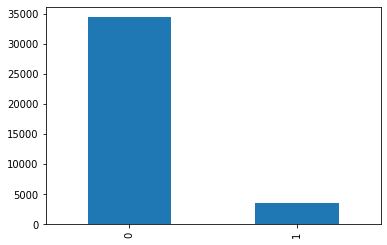

In [8]:
p=df.have_risk.value_counts().plot(kind="bar")
plt.show()

In [9]:
feature_lst = ['have_prediabetes', 'family_history', 'overweight', 'poor_diet', 'baby_weighed_over9', 'lack_physical_activity', 'high_blood_pressure', 'high_blood_sugar', 'high_cholesterol', 'hypoglycemic']

In [10]:
diabetes_data_copy = df.copy()

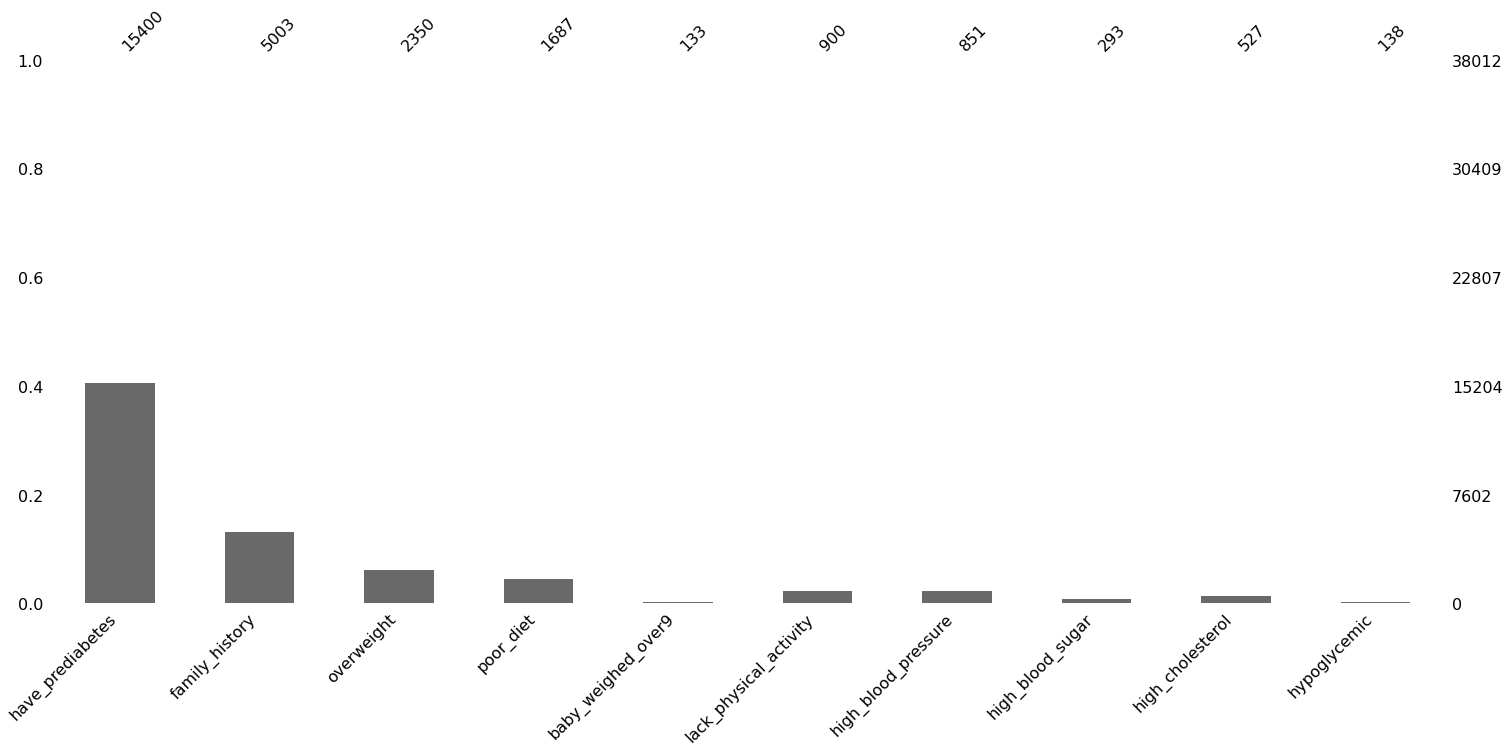

In [11]:
diabetes_data_copy[feature_lst] = diabetes_data_copy[feature_lst].replace(0,np.nan)

p=msno.bar(diabetes_data_copy[feature_lst])
plt.show()

In [110]:
from sklearn.model_selection import train_test_split
df = df.sample(frac=1,random_state=1).reset_index(drop=True)
train, test = train_test_split(df, test_size=0.2)

In [251]:
train['have_risk'].value_counts()

0    27571
1     2838
Name: have_risk, dtype: int64

In [111]:
# split 0 and 1 rows
train_1 = train[train['have_risk']==1]
train_0 = train[train['have_risk']==0]

In [112]:
train_1['have_risk'].value_counts()

1    2838
Name: have_risk, dtype: int64

In [113]:
# rebalanced df for 'Top-up Month'=1
reba_train_0 = train_0.sample(frac=0.106,random_state=1)

In [114]:
reba_train_0['have_risk'].value_counts()

0    2923
Name: have_risk, dtype: int64

In [115]:
# union the rebalanced training data
reba_train = pd.concat([train_1,reba_train_0])

In [116]:
reba_train['have_risk'].value_counts()

0    2923
1    2838
Name: have_risk, dtype: int64

In [339]:
train_rep = train.sample(frac=10,random_state=7,replace=True)

In [340]:
train_rep['have_risk'].value_counts()

0    275720
1     28370
Name: have_risk, dtype: int64

In [341]:
# split 0 and 1 rows
train_1_rep = train_rep[train['have_risk']==1]
train_0_rep = train_rep[train['have_risk']==0]

C:\Users\DELL\AppData\Local\Temp\ipykernel_7352\3799270431.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_1_rep = train_rep[train['have_risk']==1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_7352\3799270431.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_0_rep = train_rep[train['have_risk']==0]


In [342]:
# rebalanced df for 'Top-up Month'=1
reba_train_0_rep = train_0_rep.sample(frac=0.1,random_state=7)

In [343]:
reba_train_0_rep['have_risk'].value_counts()

0    27572
Name: have_risk, dtype: int64

In [344]:
# union the rebalanced training data
reba_train_rep = pd.concat([train_1_rep,reba_train_0_rep])

In [345]:
reba_train_rep['have_risk'].value_counts()

1    28370
0    27572
Name: have_risk, dtype: int64

In [336]:
reba_train_copy = reba_train.copy()

In [118]:
train_1_copy = train_1.copy()

In [119]:
train_0_copy = train_0.copy()

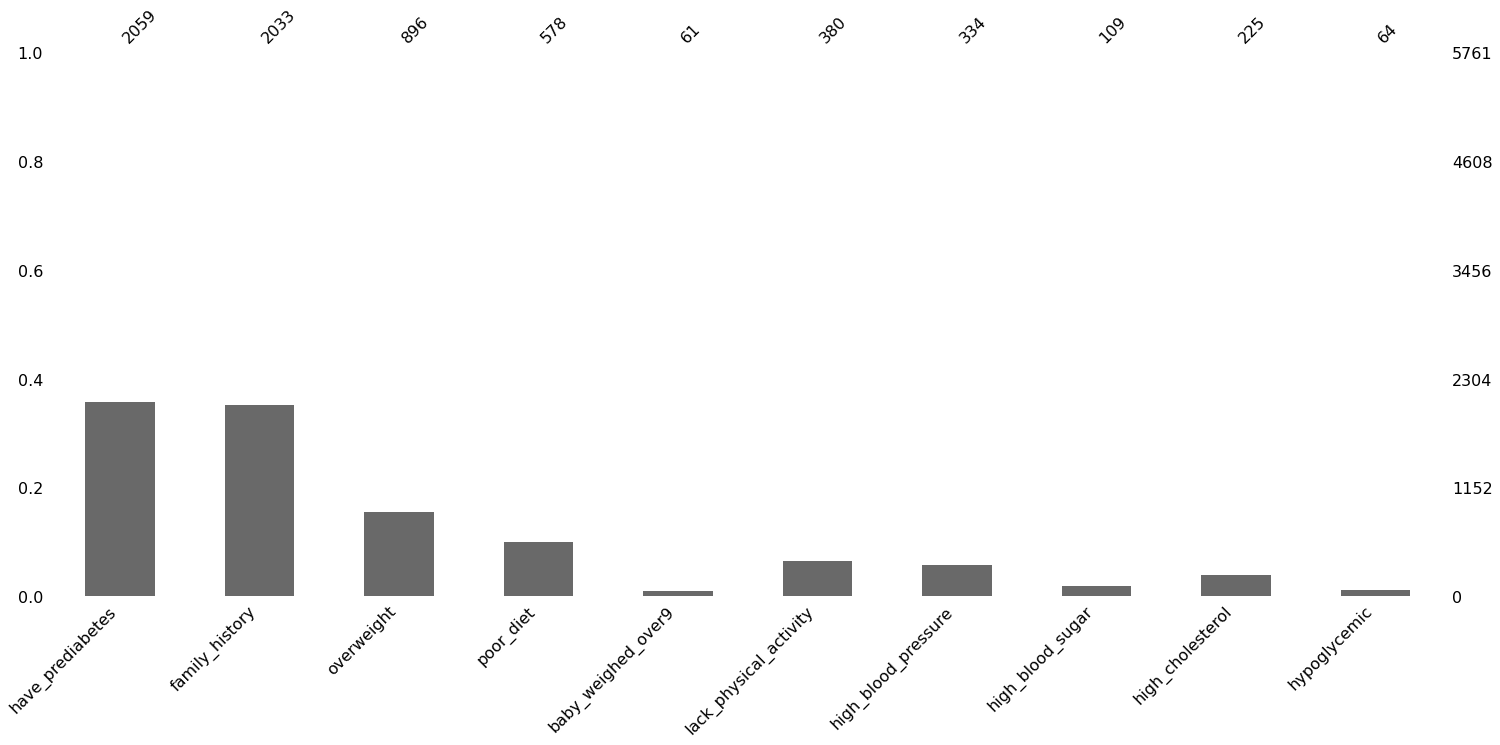

In [120]:
reba_train_copy[feature_lst] = reba_train_copy[feature_lst].replace(0,np.nan)

p=msno.bar(reba_train_copy[feature_lst])
plt.show()

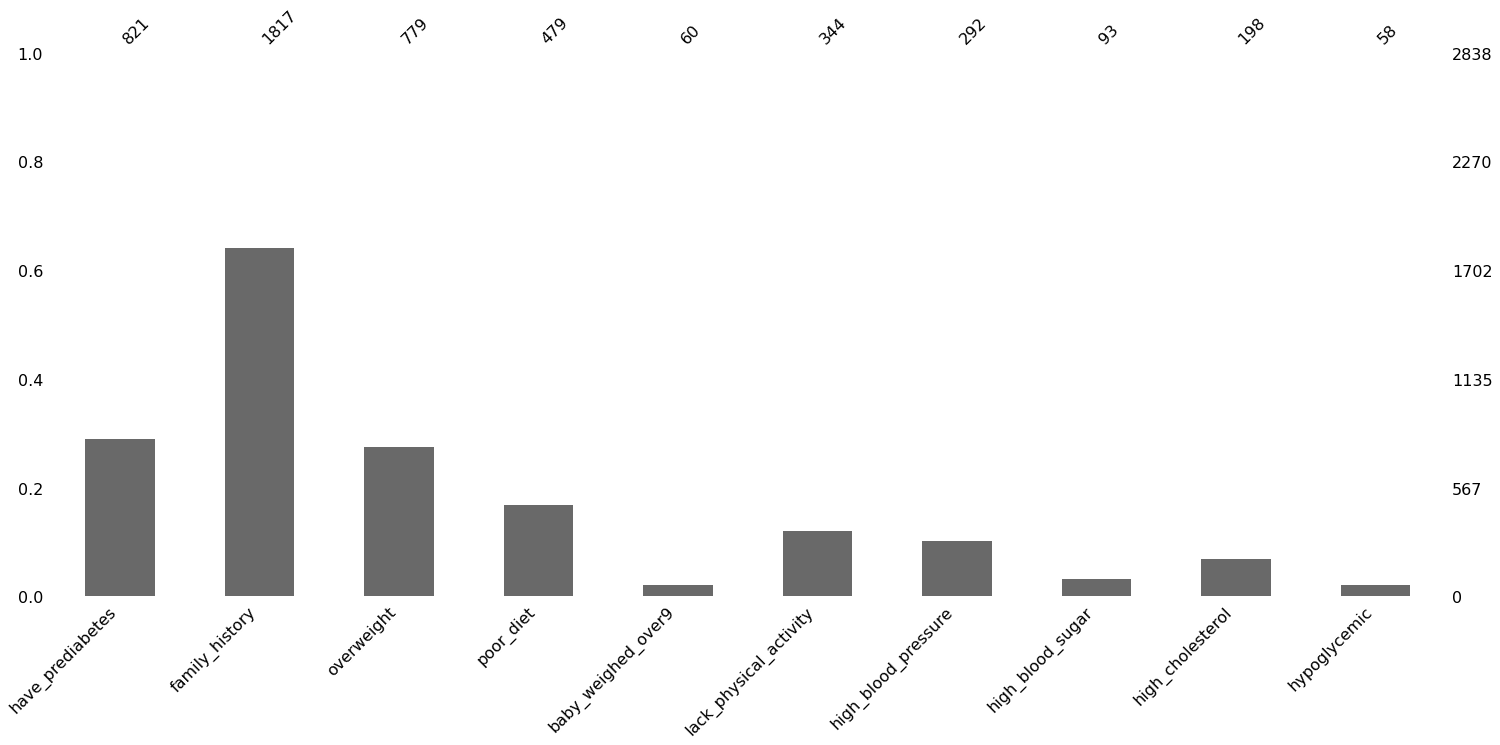

In [121]:
train_1_copy[feature_lst] = train_1_copy[feature_lst].replace(0,np.nan)

p=msno.bar(train_1_copy[feature_lst])
plt.show()

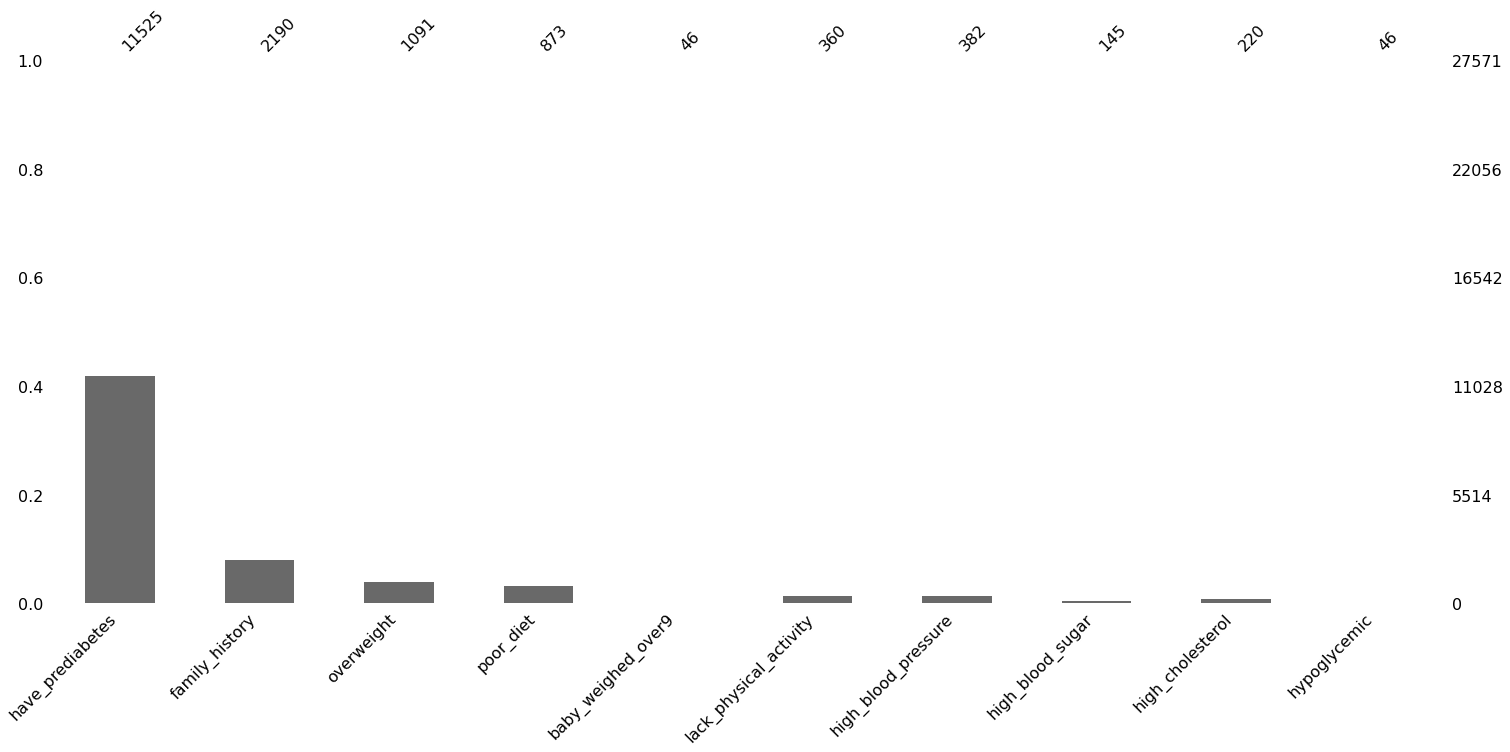

In [122]:
train_0_copy[feature_lst] = train_0_copy[feature_lst].replace(0,np.nan)

p=msno.bar(train_0_copy[feature_lst])
plt.show()

In [177]:
# # one-hot
# from numpy import array
# from numpy import argmax
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# # define example
# data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
# values = array(data)
# print(values)
# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(values)
# print(integer_encoded)
# # binary encode
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded)
# # invert first example
# inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
# print(inverted)

In [198]:
x_train = reba_train[feature_lst]

y_train = reba_train['have_risk']

x_test = test[feature_lst]

In [199]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5761 entries, 34373 to 25723
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   have_prediabetes        5761 non-null   int64
 1   family_history          5761 non-null   int64
 2   overweight              5761 non-null   int64
 3   poor_diet               5761 non-null   int64
 4   baby_weighed_over9      5761 non-null   int64
 5   lack_physical_activity  5761 non-null   int64
 6   high_blood_pressure     5761 non-null   int64
 7   high_blood_sugar        5761 non-null   int64
 8   high_cholesterol        5761 non-null   int64
 9   hypoglycemic            5761 non-null   int64
dtypes: int64(10)
memory usage: 495.1 KB


In [200]:
X = x_train.copy()
y = y_train.copy()

# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
model = logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 80.23


In [201]:
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [202]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[548,  38],
       [190, 377]], dtype=int64)

In [203]:
# Evaluation
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.78751084, 0.77777778, 0.77604167, 0.79513889, 0.79079861])

In [204]:
# Prediction
model.predict(X) # should use test data

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

Feature: 0, Score: -0.58842
Feature: 1, Score: 2.62729
Feature: 2, Score: 0.63199
Feature: 3, Score: -0.08542
Feature: 4, Score: 1.20075
Feature: 5, Score: 0.61679
Feature: 6, Score: 0.41359
Feature: 7, Score: 0.93285
Feature: 8, Score: 0.41958
Feature: 9, Score: 0.76125


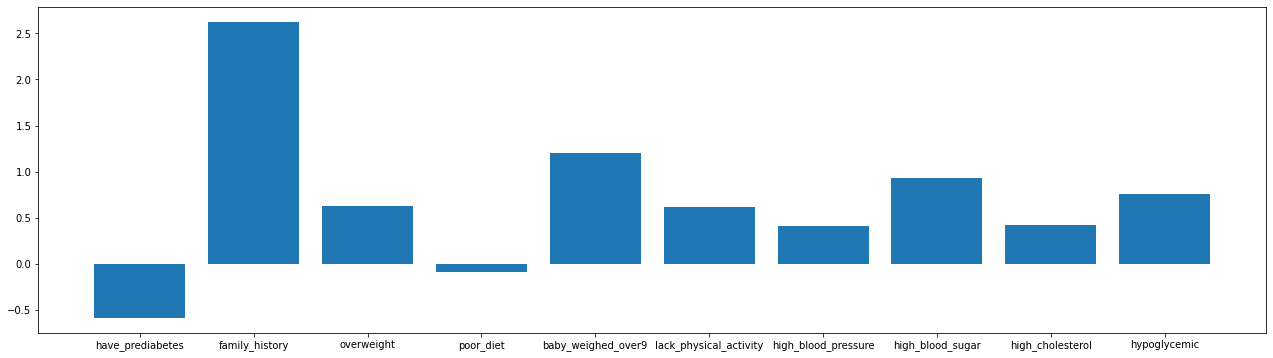

In [205]:
from sklearn.datasets import make_classification

# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(22, 6))
plt.bar(feature_lst, importance)
plt.show()

In [206]:
half_selector = SelectFromModel(logreg,
                                max_features=6)
a = half_selector.fit(X, y)

In [207]:
feature_idx = a.get_support()
feature_idx

array([False,  True, False, False,  True, False, False,  True, False,
       False])

In [189]:
feature_lst_2 = ['have_prediabetes', 'family_history', 'overweight', 'lack_physical_activity', 'high_blood_sugar', 'high_cholesterol', 'hypoglycemic']

In [208]:
# evaluation of a model using 5 features chosen with random forest importance
# from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(estimator=LogisticRegression(),max_features=6)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# split X and y into training and testing sets
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
model_fs = logreg.fit(X_train_fs,y_train)

# evaluate the model
y_pred_fs=logreg.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_fs)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 79.88


In [209]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_fs)
cnf_matrix

array([[551,  35],
       [197, 370]], dtype=int64)

In [210]:
# Evaluation
scores = cross_val_score(model_fs, X, y, cv=5)
scores

array([0.78751084, 0.77777778, 0.77604167, 0.79513889, 0.79079861])

# Decision Tree

In [384]:
def model_selection(random_state1,random_state2):
    train_rep = train.sample(frac=10,random_state=random_state1,replace=True)
    train_1_rep = train_rep[train['have_risk']==1]
    train_0_rep = train_rep[train['have_risk']==0]
    reba_train_0_rep = train_0_rep.sample(frac=0.1,random_state=random_state2)
    reba_train_rep = pd.concat([train_1_rep,reba_train_0_rep])
    
    # model
    x_train = reba_train_rep[feature_lst_final]
    y_train = reba_train_rep['have_risk']
    x_test = test[feature_lst_final]
    
    X = x_train.copy()
    y = y_train.copy()

    # split X and y into training and testing sets
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

    dt = DecisionTreeClassifier(criterion='gini',max_depth=7,class_weight=None)

    # fit the model with data
    model = dt.fit(X_train,y_train)

    #
    y_pred=dt.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    return [accuracy*100, metrics.roc_auc_score(y_test, y_pred)]

In [ ]:
accur = 80
num1 = 1
num2 = 1
for i in range(1,100):
    for k in range(1,100):
        acc = model_selection(i,k)[0]
        if acc>=accur:
            accur = acc
            num1=i
            num2=k
accur,num1,num2

In [386]:
train_rep = train.sample(frac=10,random_state=9,replace=True)

In [387]:
train_rep['have_risk'].value_counts()

0    275790
1     28300
Name: have_risk, dtype: int64

In [388]:
# split 0 and 1 rows
train_1_rep = train_rep[train['have_risk']==1]
train_0_rep = train_rep[train['have_risk']==0]

C:\Users\DELL\AppData\Local\Temp\ipykernel_7352\3799270431.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_1_rep = train_rep[train['have_risk']==1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_7352\3799270431.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_0_rep = train_rep[train['have_risk']==0]


In [389]:
# rebalanced df for 'Top-up Month'=1
reba_train_0_rep = train_0_rep.sample(frac=0.1,random_state=83)

In [390]:
reba_train_0_rep['have_risk'].value_counts()

0    27579
Name: have_risk, dtype: int64

In [391]:
# union the rebalanced training data
reba_train_rep = pd.concat([train_1_rep,reba_train_0_rep])

In [392]:
reba_train_rep['have_risk'].value_counts()

1    28300
0    27579
Name: have_risk, dtype: int64

In [393]:
x_train = reba_train_rep[feature_lst_final]

y_train = reba_train_rep['have_risk']

x_test = test[feature_lst_final]

In [394]:
X = x_train.copy()
y = y_train.copy()

# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

dt = DecisionTreeClassifier(criterion='gini',max_depth=7,class_weight=None)

# fit the model with data
model = dt.fit(X_train,y_train)

#
y_pred=dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

print('AUC: %.2F' % (metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 81.02
AUC: 0.81


In [395]:
# Evaluation
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.79438082, 0.80055476, 0.79491768, 0.80511811, 0.79472036])

In [396]:
import sklearn.metrics as matrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83      5555
           1       0.88      0.72      0.79      5621

    accuracy                           0.81     11176
   macro avg       0.82      0.81      0.81     11176
weighted avg       0.82      0.81      0.81     11176



In [397]:
sorted(list(zip(X.columns,dt.feature_importances_)),key=lambda x:x[1],reverse=True)

[('family_history', 0.7732541367567839),
 ('have_prediabetes', 0.18725459701142),
 ('overweight', 0.015371550321633141),
 ('high_blood_sugar', 0.012230429031890824),
 ('poor_diet', 0.009029396789915827),
 ('lack_physical_activity', 0.0028598900883563035)]

In [216]:
feature_lst_final = ['have_prediabetes', 'family_history', 'overweight', 'poor_diet', 'lack_physical_activity', 'high_blood_sugar']

In [360]:
x_train = reba_train[feature_lst_final]

y_train = reba_train['have_risk']

x_test = test[feature_lst_final]

In [319]:
X = x_train.copy()
y = y_train.copy()

# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

dt = DecisionTreeClassifier(criterion='gini',max_depth=4,class_weight=None, random_state=123)

# fit the model with data
model = dt.fit(X_train,y_train)

#
y_pred=dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

print('AUC: %.2F' % (metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 81.87
AUC: 0.82


In [320]:
# Evaluation
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.80398959, 0.79600694, 0.79253472, 0.80729167, 0.80295139])

In [321]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       586
           1       0.90      0.71      0.79       567

    accuracy                           0.82      1153
   macro avg       0.83      0.82      0.82      1153
weighted avg       0.83      0.82      0.82      1153



In [248]:
sorted(list(zip(X.columns,dt.feature_importances_)),key=lambda x:x[1],reverse=True)

[('family_history', 0.7972972442865651),
 ('have_prediabetes', 0.1692615007065244),
 ('overweight', 0.018342830660475387),
 ('high_blood_sugar', 0.00987938551193591),
 ('poor_diet', 0.0028057307764895404),
 ('lack_physical_activity', 0.0024133080580095684)]

In [249]:
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [250]:
content=dt.predict_proba(X_test)
content #[0,1]

array([[0.65178067, 0.34821933],
       [0.16113744, 0.83886256],
       [0.01075269, 0.98924731],
       ...,
       [0.65178067, 0.34821933],
       [0.16113744, 0.83886256],
       [0.12230216, 0.87769784]])

In [58]:
from sklearn.model_selection import ParameterGrid, GridSearchCV

In [59]:
# max_depth = [None,]
# max_leaf_nodes = np.arange(3,8,1)
# class_weight = [{0:1,1:2},{0:1,1:3}]

# param_grid = {'max_depth': max_depth,
#               'max_leaf_nodes': max_leaf_nodes,
#               'class_weight': class_weight}

# dt_cv = GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,scoring='roc_auc')
# dt_cv.fit(X_train,y_train)

In [398]:
param = {'criterion':['gini'],'max_depth':[x for x in range(5,15,1)]}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=5)
grid.fit(X_train,y_train)
print('最优分类器:',grid.best_params_,'最优分数:', grid.best_score_)  # 得到最优的参数和分值


最优分类器: {'criterion': 'gini', 'max_depth': 7} 最优分数: 0.7950024658293107


In [373]:
[x for x in range(2,10,2)]

[2, 4, 6, 8]

# SVM

In [257]:
x_train = reba_train[feature_lst_final]

y_train = reba_train['have_risk']

x_test = test[feature_lst_final]

In [258]:
X = x_train.copy()
y = y_train.copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
model = svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

print('AUC: %.2F' % (metrics.roc_auc_score(y_test, y_pred)))


Accuracy: 79.44
AUC: 0.79


In [259]:
# Evaluation
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.78577624, 0.77690972, 0.77951389, 0.79513889, 0.79513889])

In [255]:
# Prediction
model.predict(X) # should use test data

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [256]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[541  37]
 [200 375]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       578
           1       0.91      0.65      0.76       575

    accuracy                           0.79      1153
   macro avg       0.82      0.79      0.79      1153
weighted avg       0.82      0.79      0.79      1153

